In [27]:
import numpy as np

iris_data = np.loadtxt("data/irisdata.txt", comments="%")
# x is a matrix with 50 rows and 4 columns
x = iris_data[0:50, 0:4]
print(x.shape)

(50, 4)


In [4]:
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

Number of features: 4 and number of observations: 50


In [ ]:
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]

In [9]:
# Use ddof = 1 to make an unbiased estimate
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_w = pet_w.var(ddof=1)

In [10]:
cov_sep_l_w  = sep_l.dot(sep_w) / (n_obs - 1)
cov_sep_l_pet_l = sep_l.dot(pet_l) / (n_obs - 1)
print(f"Covariance between sepal length and petal length: {cov_sep_l_pet_l}")
print(f"Covariance between sepal length and sepal width: {cov_sep_l_w }")

Covariance between sepal length and petal length: 7.484489795918368
Covariance between sepal length and sepal width: 17.61


In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

<Figure size 640x480 with 0 Axes>

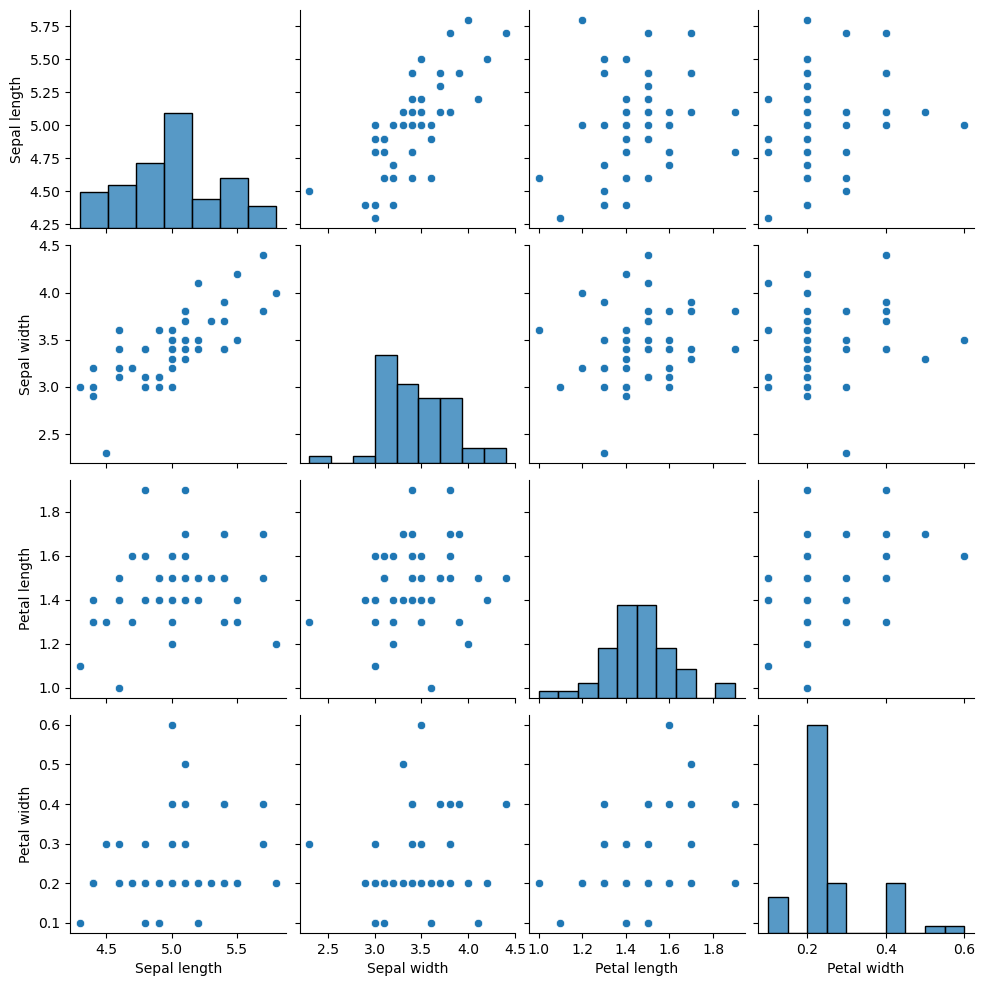

In [15]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=["Sepal length", "Sepal width",
							 "Petal length", "Petal width"])
sns.pairplot(d)
plt.show()

In [16]:
mn = np.mean(x, axis=0)
data = x - mn

In [18]:
cov_mat = np.matmul(data.T, data) / (n_obs - 1)
cov_mat_direct = np.cov(data, rowvar=False)
print(f"Difference between the two covariance matrices: {np.linalg.norm(cov_mat - cov_mat_direct)}")

Difference between the two covariance matrices: 8.640594771217225e-17


In [19]:
values, vectors = np.linalg.eig(cov_mat) 

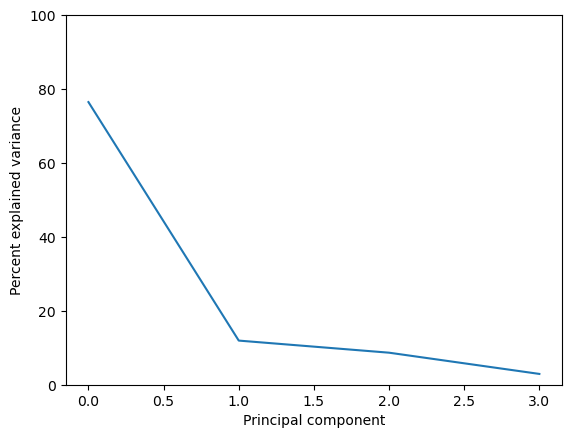

100.0


In [ ]:
v_norm = values / values.sum() * 100
plt.plot(v_norm)
plt.xlabel("Principal component")
plt.ylabel("Percent explained variance")
plt.ylim([0, 100])

plt.show()

In [23]:
pc_proj = vectors.T.dot(data.T)

In [26]:
print(vectors.shape)
print(pc_proj.shape)


(4, 4)
(4, 50)


<Figure size 640x480 with 0 Axes>

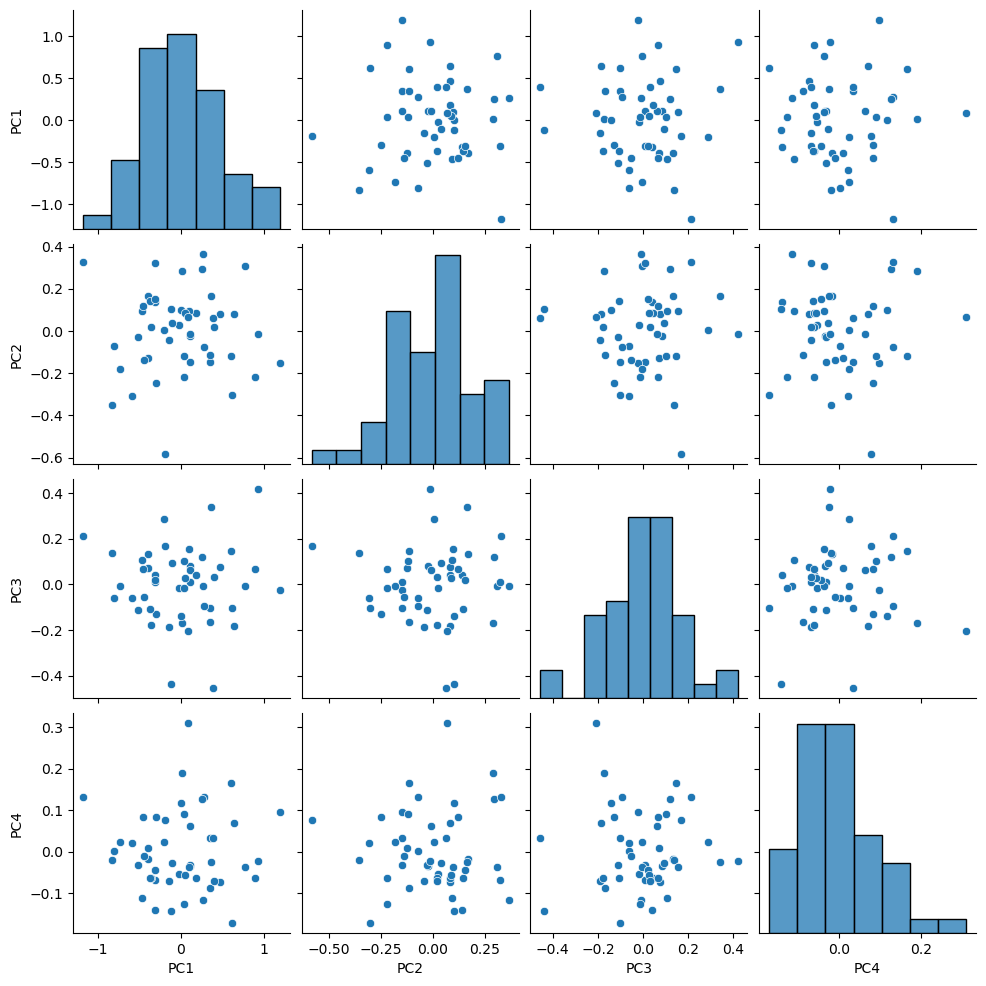

In [28]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(pc_proj.T, columns=["PC1", "PC2", "PC3", "PC4"])
sns.pairplot(d)
plt.show()

In [29]:
from sklearn import decomposition

In [30]:
pca = decomposition.PCA()
pca.fit(x)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_

data_transform = pca.transform(x)

<Figure size 640x480 with 0 Axes>

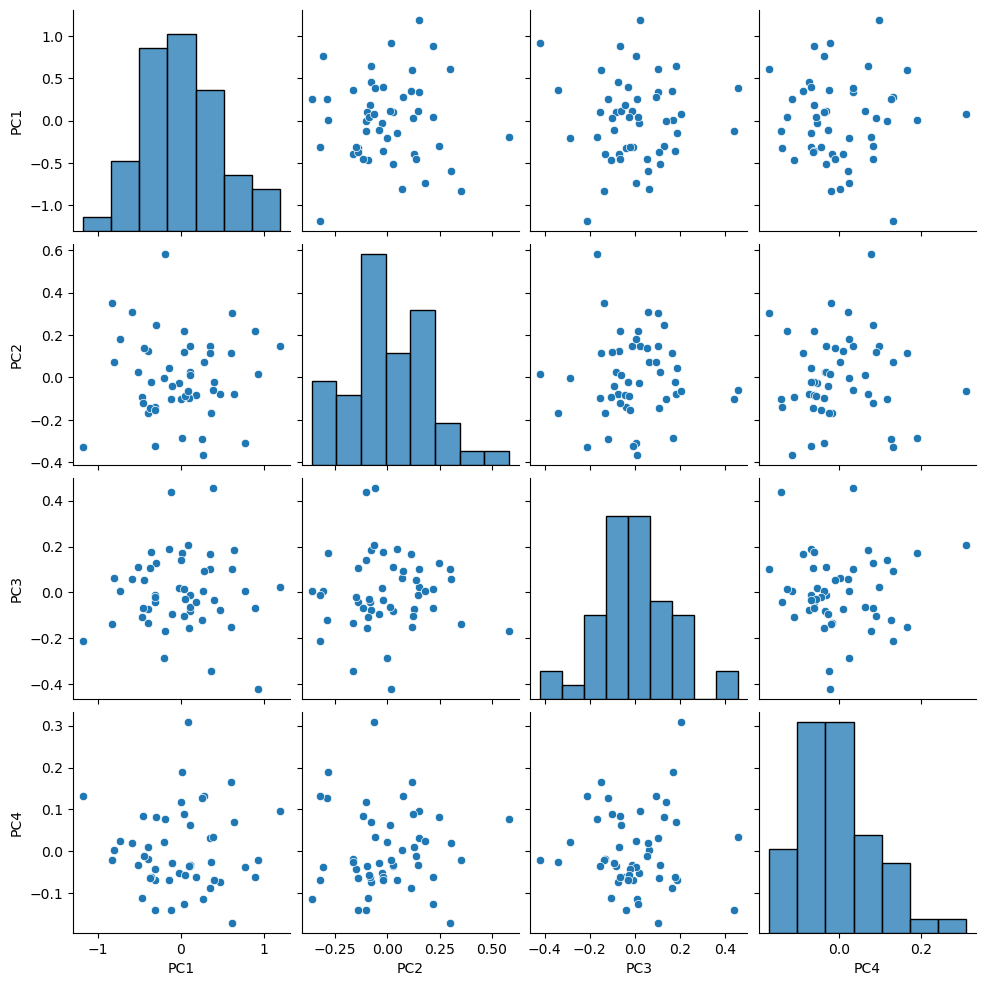

In [31]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(data_transform, columns=["PC1", "PC2", "PC3", "PC4"])
sns.pairplot(d)
plt.show()